In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from argparse import Namespace

In [2]:
opt = Namespace(
#     source_img = "../images/perfil_original.png",
#     mask_img = "../images/perfil_mask.png",
    target_img = "../images/first_target.jpg",
    annot_img = "../localization/obj_train_data/first_target.txt"
)

In [3]:
def letterbox(img, new_shape=(640, 640), color=(0, 0, 0), auto=True, scaleFill=False, scaleup=True):
    # Resize image to a 32-pixel-multiple rectangle https://github.com/ultralytics/yolov3/issues/232
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, 32), np.mod(dh, 32)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

def image_resize(img, img_size):
    """Resize image keeping aspect ratio
    Args:
        img_size (tuple): h, w
    """
    # h0, w0 = img.shape[:2]  # orig hw
    # r = img_size[0] / max(h0, w0)  # resize image to img_size
    # if r != 1:  # always resize down, only resize up if training with augmentation
    #    interp = cv2.INTER_AREA if r < 1 else cv2.INTER_LINEAR
    #    img = cv2.resize(img, (int(w0 * r), int(h0 * r)), interpolation=interp)
    # h, w = img.shape[:2] # hw_resized
    # img, (h0, w0), img.shape[:2]  # img, hw_original, hw_resized
    # letterbox
    img, ratio, (dw, dh) = letterbox(img, img_size, auto=False)
    print(dw, dh)
    return img

In [4]:
def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
def plot_image(img):
    plt.imshow(img)
    plt.show()

In [16]:
target_img = to_rgb(cv2.imread(opt.target_img))
h, w = target_img.shape[:2]
# target_img = image_resize(target_img, (640, 640))

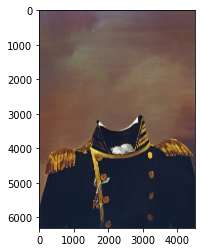

In [17]:
plot_image(target_img)

In [18]:
hsv = cv2.cvtColor(target_img, cv2.COLOR_RGB2HSV)

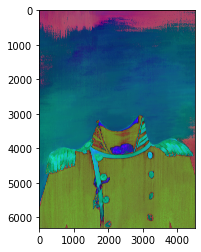

In [22]:
plot_image(hsv)

In [20]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(target_img, target_img, mask= mask)

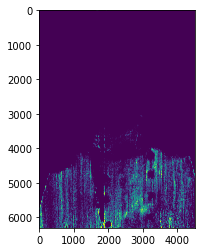

In [23]:
plot_image(mask)

In [24]:
cv2.imwrite("test.jpg", mask)

True

# Read localization objects

In [95]:
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = np.zeros_like(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y

In [96]:
lines = open(opt.annot_img, "r").readlines()
coords = np.array([line.strip().split(" ")[1:] for line in lines],
                  dtype=np.float32)
b = coords * [w, h, w, h]
b_ = xywh2xyxy(b).astype(np.int)
b = b.astype(np.int)

In [97]:
b, b_

(array([[2338, 5141, 3962, 2316],
        [2331, 3759, 1520,  439]]),
 array([[ 357, 3983, 4319, 6300],
        [1571, 3539, 3091, 3979]]))

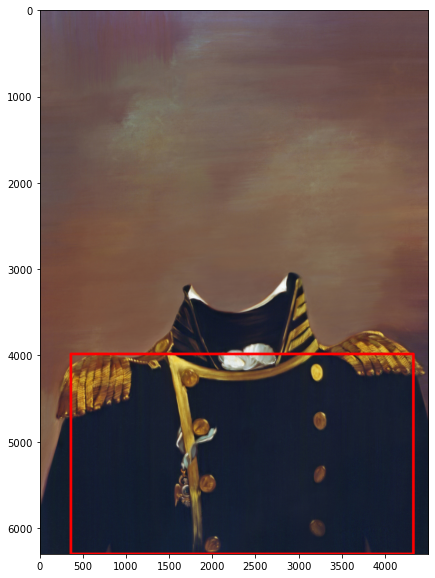

In [98]:
img_copy = target_img.copy()
x_, y_ = b_[0,0], b_[0,1]
w_, h_ = b[0,2],  b[0,3]
img_copy = cv2.rectangle(img_copy, (x_, y_), (x_+w_, y_+h_), color=(255, 0, 0),
                        thickness=30)
w_list = [(i+1)*w_//4 for i in range(4)]
h_list = [(i+1)*h_//5 for i in range(5)]

for w in w_list:
    pass
#     img_copy = cv2.rectangle(img_copy, (x_, y_), (x_+w, y_+h), color=(255, 0, 0),
#                         thickness=30)
    
for h in h_list:
    pass
#     img_copy = cv2.rectangle(img_copy, (x_, y_), (x_+w, y_+h), color=(255, 0, 0),
#                         thickness=30)
    
plt.figure(figsize=(10, 10))
plot_image(img_copy)

In [99]:
# img_copy = cv2.rectangle(img_copy, (x_ + w_list[0], y_ - h_list[0]),
#                          (x_ + w_list[2], y_), color=(255, 0, 0),
#                         thickness=30)
# plt.figure(figsize=(10, 10))
# plot_image(img_copy)

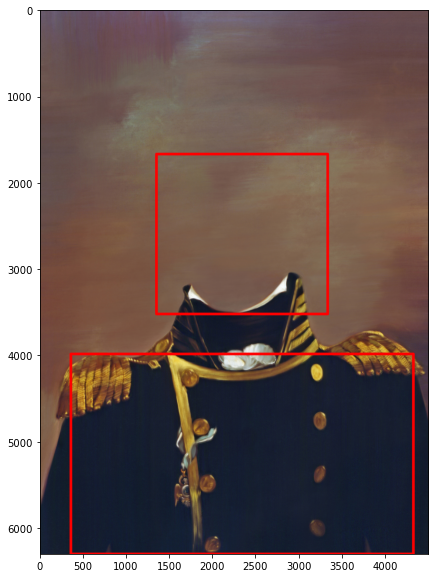

In [100]:
img_copy = cv2.rectangle(img_copy, (x_ + w_list[0], y_ - h_list[0] - 4*h_list[0]),
                         (x_ + w_list[2], y_ - h_list[0]), color=(255, 0, 0),
                        thickness=30)
plt.figure(figsize=(10, 10))
plot_image(img_copy)

In [140]:
head_box = np.array( [x_ + w_list[0], y_ - h_list[0] - 4*h_list[0],
                         x_ + w_list[2], y_ - h_list[0]])

# Scale coordinates

In [101]:
(x_ + w_list[0], y_ - h_list[0] - 4*h_list[0]), \
  (x_ + w_list[2], y_ - h_list[0])

((1347, 1668), (3328, 3520))

91.5 0.0


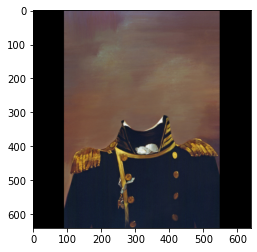

In [102]:
resize_target_img = image_resize(target_img, (640, 640))
plot_image(resize_target_img)

In [103]:
b , b_ # xywh, xyxy

(array([[2338, 5141, 3962, 2316],
        [2331, 3759, 1520,  439]]),
 array([[ 357, 3983, 4319, 6300],
        [1571, 3539, 3091, 3979]]))

In [133]:
def scale_coords(img1_shape, coords, img0_shape, ratio_pad=None):
    # Rescale coords (xyxy) from img1_shape to img0_shape
    r = min(img0_shape[0]/img1_shape[0],
                img0_shape[1]/img1_shape[1])  # r  = new / old
    pad = (img0_shape[1] - img1_shape[1]*r) / 2, \
    (img0_shape[0] - img1_shape[0]*r) / 2  # wh padding

    coords[:, :4] *= r
    
    print(pad)
    coords[:, [0, 2]] += pad[0]  # x padding
    coords[:, [1, 3]] += pad[1]  # y padding
    # clip_coords(coords, img0_shape)
    return coords


def clip_coords(boxes, img_shape):
    # Clip bounding xyxy bounding boxes to image shape (height, width)
    boxes[:, 0].clip(0, img_shape[1])  # x1
    boxes[:, 1].clip(0, img_shape[0])  # y1
    boxes[:, 2].clip(0, img_shape[1])  # x2
    boxes[:, 3].clip(0, img_shape[0])  # y2

In [134]:
(target_img.shape[:-1],resize_target_img.shape[:-1])

((6300, 4500), (640, 640))

In [135]:
resize_b = scale_coords(target_img.shape[:-1],
             b_.astype(np.float64), resize_target_img.shape[:-1]).astype(int)

(91.42857142857142, 0.0)


In [136]:
resize_b

array([[127, 404, 530, 640],
       [251, 359, 405, 404]])

In [143]:
resize_b_head = scale_coords(target_img.shape[:-1], head_box.astype(np.float64).reshape(1, -1), resize_target_img.shape[:-1]).astype(int)

(91.42857142857142, 0.0)


127 404 530 640


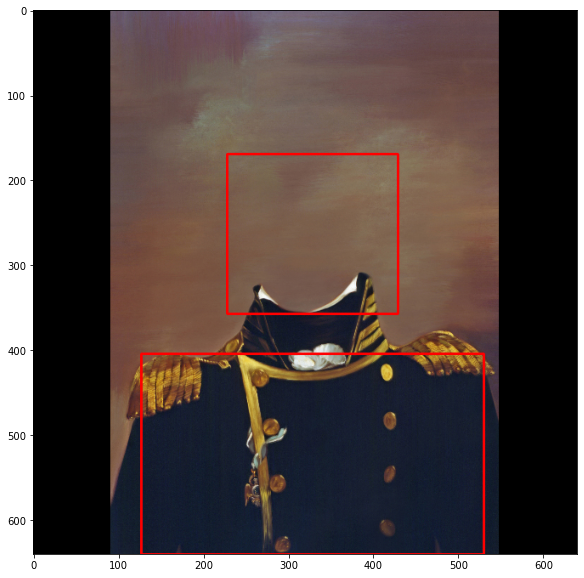

In [144]:
img_copy = resize_target_img.copy()
x1_, y1_, x2_, y2_ = resize_b[0,0], resize_b[0,1], resize_b[0,2],  resize_b[0,3]
print(x1_, y1_, x2_, y2_)
img_copy = cv2.rectangle(img_copy, (x1_, y1_), (x2_, y2_), (255, 0, 0), 2)
x1_, y1_, x2_, y2_ = resize_b_head[0,0], resize_b_head[0,1], resize_b_head[0,2],  resize_b_head[0,3]
img_copy = cv2.rectangle(img_copy, (x1_, y1_), (x2_, y2_), (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plot_image(img_copy)